# Team 9: Study of geographic hotspots for meteorite falls and mass variations

In [15]:
import pandas as pd

In [16]:
df = pd.read_csv('/Users/tonyguan/Desktop/ece143_project/Data_set/Meteorite_Landings.csv')
# currently using localpath 

In [17]:
df

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation
0,Aachen,1,Valid,L5,21.0,Fell,1880.0,50.77500,6.08333,"(50.775, 6.08333)"
1,Aarhus,2,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333,"(56.18333, 10.23333)"
2,Abee,6,Valid,EH4,107000.0,Fell,1952.0,54.21667,-113.00000,"(54.21667, -113.0)"
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976.0,16.88333,-99.90000,"(16.88333, -99.9)"
4,Achiras,370,Valid,L6,780.0,Fell,1902.0,-33.16667,-64.95000,"(-33.16667, -64.95)"
...,...,...,...,...,...,...,...,...,...,...
45711,Zillah 002,31356,Valid,Eucrite,172.0,Found,1990.0,29.03700,17.01850,"(29.037, 17.0185)"
45712,Zinder,30409,Valid,"Pallasite, ungrouped",46.0,Found,1999.0,13.78333,8.96667,"(13.78333, 8.96667)"
45713,Zlin,30410,Valid,H4,3.3,Found,1939.0,49.25000,17.66667,"(49.25, 17.66667)"
45714,Zubkovsky,31357,Valid,L6,2167.0,Found,2003.0,49.78917,41.50460,"(49.78917, 41.5046)"


In [18]:
df.shape

(45716, 10)

## Geosptial Analysis

In [31]:
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt

In [32]:
long_lat = df[['reclat', 'reclong']]
long_lat = pd.DataFrame(long_lat)
long_lat

,reclat,reclong
0,50.77500,6.08333
1,56.18333,10.23333
2,54.21667,-113.00000
3,16.88333,-99.90000
4,-33.16667,-64.95000
...,...,...
45711,29.03700,17.01850
45712,13.78333,8.96667
45713,49.25000,17.66667
45714,49.78917,41.50460


/var/folders/8l/n9gy6psn2_n84_v61j_vw58m0000gn/T/ipykernel_48809/3677568071.py:5: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


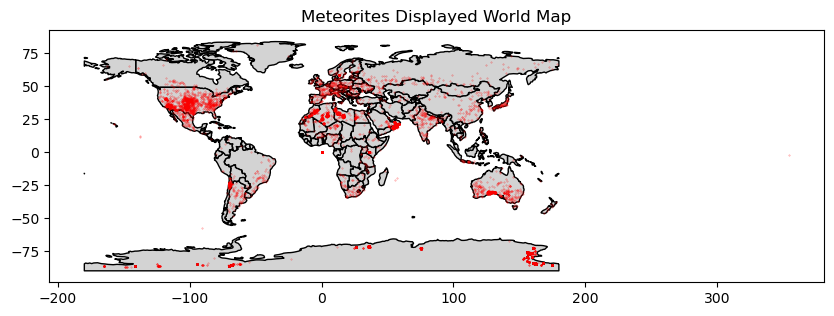

In [36]:
geometry = [Point(long, lat) for long, lat in zip(long_lat['reclong'], long_lat['reclat'])]
geo_df = gpd.GeoDataFrame(long_lat, geometry=geometry, crs="EPSG:4326")

# Plot the GeoDataFrame
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
ax = world.plot(figsize=(10, 6), color='lightgray', edgecolor='black')
geo_df.plot(ax=ax, marker='o', color='red', markersize=0.1, alpha=0.5)

plt.title('Meteorites Displayed World Map')
plt.show()